# 1번 대한민국 육국 신체 측정 데이터 [몸무게->허리둘레예측]

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [251]:
f = open('./armybody.csv', "r", newline='\r') 
data = f.readline() 

lines = data.split('\n') 
header = lines[0].split(',') 
print(header) 

data = []
while 1:
    line = f.readline()
    data.append(line)
    if not line: break
f.close()

['순번', '측정 일자', '가슴 둘레 센티미터', '소매길이 센티미터', '신장 센티미터', '허리 둘레 센티미터', '샅높이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터', '몸무게 킬로그램\r']


In [252]:
data = np.array(data)
print(data.shape)

(135672,)


In [253]:
print(data[108400])
sample = data[108400].strip('\n').split(',')
print(sample)
print(len(sample))


108401,20160307,,85.9,171.3,91.7,79,57.1,25.2,69.5
['108401', '20160307', '', '85.9', '171.3', '91.7', '79', '57.1', '25.2', '69.5\r']
10


In [254]:
new_data = []
for i in range(0, len(data)):
    seq = data[i].strip().split(',')
    if not len(seq)==10:
        print(i)
    if i==108400:
        continue
    if len(seq)==10:
        new_data.append(seq)
df = np.array(new_data, 'float')

135670
135671


In [255]:
print(data[135670])

### 1-1 데이터 세트의 차원 형태(dimension shape)를 출력해 보세요.

In [348]:
print(df.shape)
print('결측치가 있는 108400데이터와, 읽어지지 않는 135670두개의 데이터를 제외한 결과입니다.')

(135669, 10)
결측치가 있는 108400데이터와, 읽어지지 않는 135670두개의 데이터를 제외한 결과입니다.


### 1-2 2차원 평면에 몸무게와 허리둘레 데이터 포인트들을 가시화 해보세요.

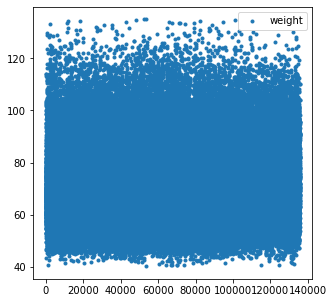

<Figure size 720x1080 with 0 Axes>

In [257]:
plt.plot(df[:,-1], '.')
plt.legend(['weight'])
plt.figure(figsize=(10,15))
plt.show()

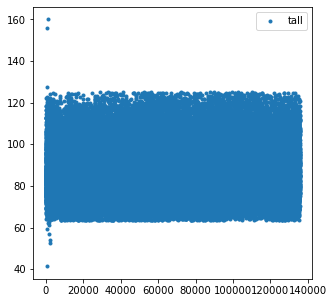

<Figure size 720x1080 with 0 Axes>

In [258]:
plt.plot(df[:,5], '.')
plt.legend(['tall'])
plt.figure(figsize=(10,15))
plt.show()

### 1-3 데이터 세트 중 100000개를 학습 세트로 하고 나머지를 테스트 세트로 나누고 각 세트의 마지막 데이터를 출력해 보세요.

In [259]:
trainX = df[:100000, -1].reshape(-1,1)
trainY = df[:100000, 5].reshape(-1,1)
testX = df[100000:, -1].reshape(-1,1)
testY = df[100000:, 5].reshape(-1,1)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(100000, 1)
(100000, 1)
(35669, 1)
(35669, 1)


In [260]:
print(trainX[-1], trainY[-1])
print(testX[-1], testY[-1])

[65.9] [79.5]
[90.6] [105.9]


### 1-4 선형회귀(linear regression) 모델을 설계하고 학습 모델의 구성하고 각 계층별 요약과 파라미터 수를 출력해 보세요.

In [261]:
model = nn.Linear(1,1)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.0002)

In [262]:
print(model)
print(list(model.parameters()))

Linear(in_features=1, out_features=1, bias=True)
[Parameter containing:
tensor([[-0.9989]], requires_grad=True), Parameter containing:
tensor([0.0727], requires_grad=True)]


### 1-5 에포크를 1000, 학습률 0.001로 튜닝하고 테스트 데이터로 에포크별 MAE(mean absolute error) 손실을 평가하여 그래프로 그려보세요.

In [263]:
num_epoch = 1000

In [264]:
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)
testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

In [266]:
print(trainX_tensor.shape)
print(trainY_tensor.shape)

torch.Size([100000, 1])
torch.Size([100000, 1])


In [267]:
loss_arr =[]

for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(trainX_tensor)
    loss = loss_func(output,trainY_tensor)
    loss.backward()
    
    optimizer.step()
        
    loss_arr.append(loss.detach().numpy())

lr = 0.01


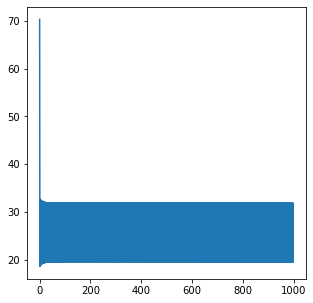

In [172]:
print('lr = 0.01')
plt.plot(loss_arr)

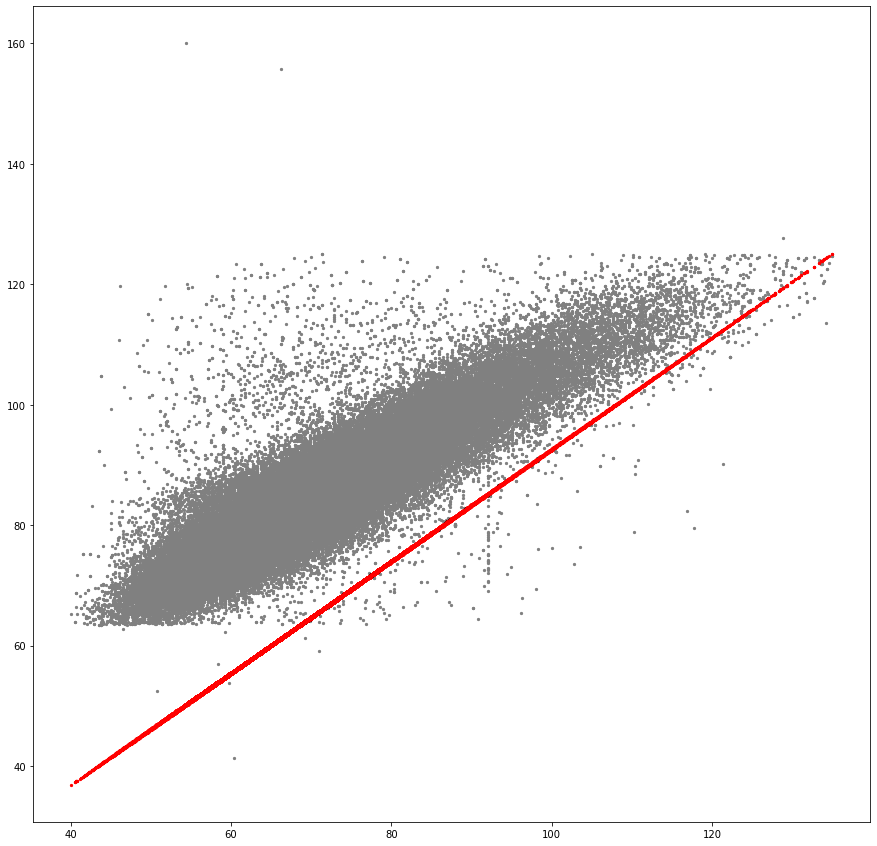

lr = 0.01


In [173]:
plt.figure(figsize=(15,15))
plt.scatter(trainX_tensor.numpy(),trainY_tensor.numpy(),s=5,c="gray")
plt.scatter(trainX_tensor.detach().numpy(),output.detach().numpy(),s=5,c="red")
plt.show()
print('lr = 0.01')

###  1-6 손실함수로 MSE(mean squared error)를 사용해도 성능이 잘 나오도록 튜닝해 보세요.

lr = 0.0002


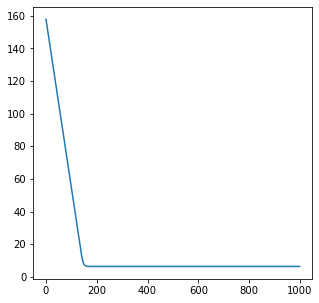

In [268]:
print('lr = 0.0002')
plt.plot(loss_arr)

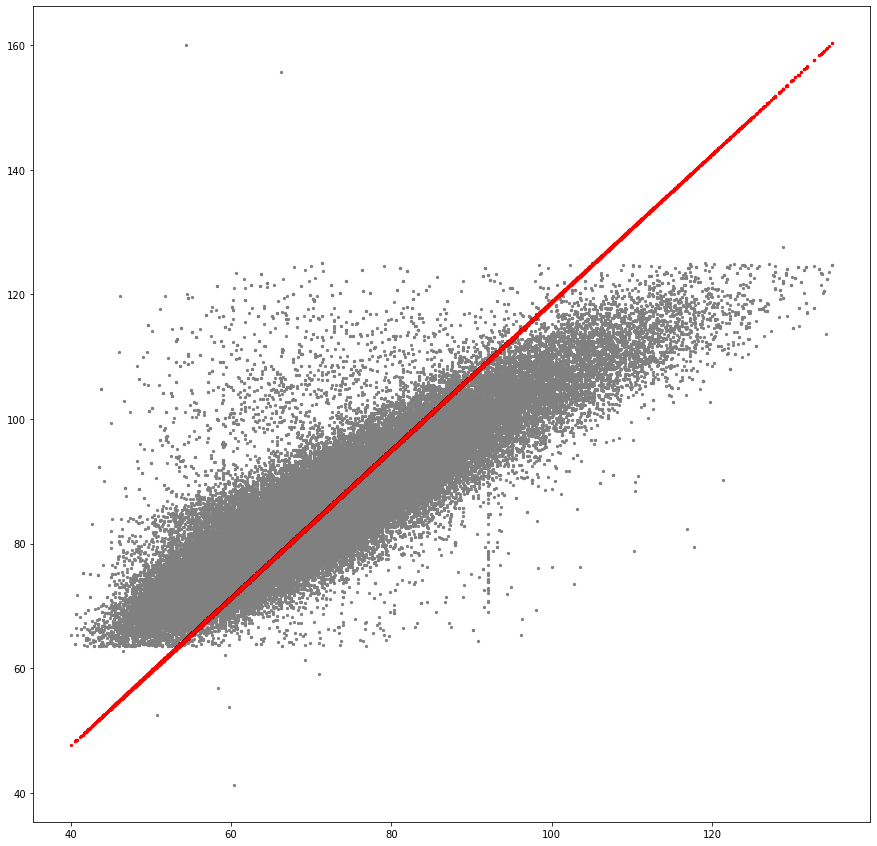

lr = 0.0002


In [269]:
plt.figure(figsize=(15,15))
plt.scatter(trainX_tensor.numpy(),trainY_tensor.numpy(),s=5,c="gray")
plt.scatter(trainX_tensor.detach().numpy(),output.detach().numpy(),s=5,c="red")
plt.show()
print('lr = 0.0002')

# 2번 인공신경망 설계

In [271]:
num_data =1000

In [272]:
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x+noise)**3
y_noise = y + noise

In [273]:
print(x.shape)
print(y.shape)

torch.Size([1000, 1])
torch.Size([1000, 1])


### 2-1 2차원 평면에 x, y 포인트들을 가시화 해보세요.

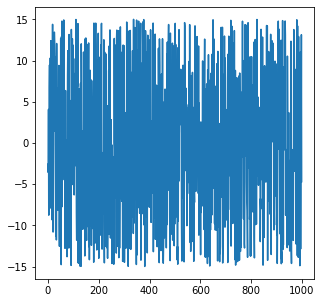

In [274]:
plt.plot(x)
plt.rcParams['figure.figsize'] = [5, 5]

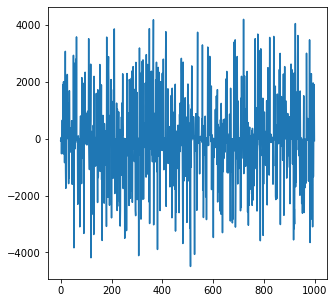

In [275]:
plt.plot(y)

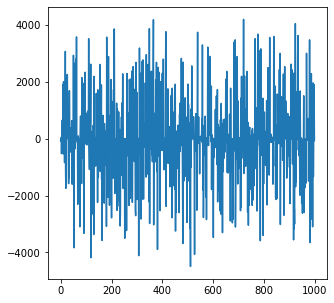

In [276]:
plt.plot(y_noise)

### 2-2 특성의 개수가 1 -> 50 -> 100 -> 1개로 변하는 완전연결 신경망(fully connected neural network) 모델을 설계하고 학습 모델의 구성과 각 계층별 요약과 파라미터 수를 출력해 보세요.

In [279]:
model = nn.Sequential(
          nn.Linear(1,50),
          nn.ReLU(),
          nn.Linear(50,100),
          nn.ReLU(),
          nn.Linear(100,1)
      )

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.0002)

In [280]:
print(model)
print(list(model.parameters()))

Sequential(
  (0): Linear(in_features=1, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=1, bias=True)
)
[Parameter containing:
tensor([[ 0.6889],
        [ 0.7615],
        [ 0.6350],
        [-0.4935],
        [-0.4293],
        [ 0.3529],
        [ 0.7595],
        [-0.2271],
        [ 0.9399],
        [ 0.7234],
        [ 0.0991],
        [-0.5423],
        [ 0.6210],
        [-0.4160],
        [ 0.9601],
        [-0.9942],
        [-0.3650],
        [-0.0538],
        [-0.8180],
        [-0.9769],
        [ 0.0070],
        [-0.8975],
        [ 0.3065],
        [ 0.3240],
        [ 0.3079],
        [-0.6589],
        [ 0.9711],
        [-0.0983],
        [-0.9970],
        [ 0.9710],
        [-0.5667],
        [-0.9331],
        [ 0.0765],
        [ 0.1807],
        [ 0.3450],
        [-0.0554],
        [-0.0644],
        [-0.8512],
        [ 0.3380],
        [-0.1693],
 

### 2-3 에포크 10000, 학습률 0.0002로 설정하고 에포크별 MAE(mean absolute error) 손실을 평가하여 그래프로 그려보세요.

In [281]:
num_epoch = 10000

In [282]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

TypeError: 'lr' is an invalid keyword argument for print()

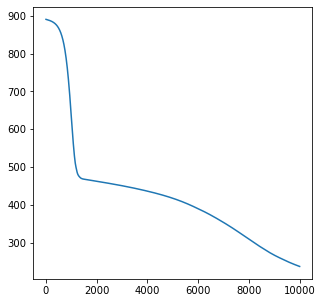

In [285]:
plt.plot(loss_array)
print('lr=0.0002')

### 2-4 손실함수로 MSE(mean squared error)를 사용해도 성능이 잘 나오도록 튜닝해 보세요.

In [294]:
loss_func = nn.L1Loss()
optimizer = optim.Adam(model.parameters(),lr=0.005)
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

Adam,lr=0.0001


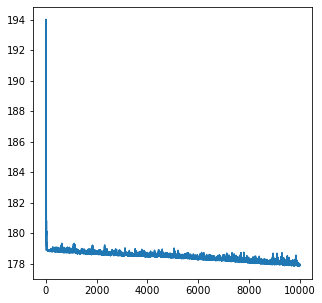

In [295]:
plt.plot(loss_array)
print('Adam,lr=0.0001')

# 3번 보너스

In [284]:
mnist_train = dset.FashionMNIST(root="../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.FashionMNIST(root="../", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

### 3-1 학습 세트의 마지막 데이터를 이미지로 출력해 보세요.

In [310]:
print(mnist_train.__getitem__(0)[0].size(), mnist_train.__len__())
print(mnist_test.__getitem__(0)[0].size(), mnist_test.__len__())
print(len(mnist_train),len(mnist_test))

torch.Size([1, 28, 28]) 60000
torch.Size([1, 28, 28]) 10000
60000 10000


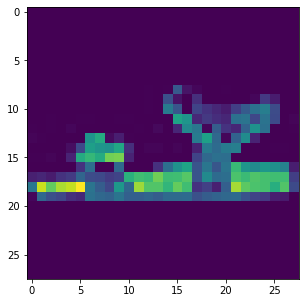

In [311]:
plt.imshow(mnist_train.__getitem__(59999)[0].reshape(28,28))
plt.show()

### 3-2 학습 세트의 마지막 데이터에 대하여 1개의 채널을 입력으로 받아서 3개의 채널이 나오는 컨볼루션 연산을 적용해서 출력해 보세요.

In [326]:
model = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=3,kernel_size=1)
      )

output = model(mnist_train.__getitem__(59999)[0].reshape(-1,1,28,28))
print(output.shape)
print(output)

torch.Size([1, 3, 28, 28])
tensor([[[[-0.7178, -0.7178, -0.7178,  ..., -0.7178, -0.7178, -0.7178],
          [-0.7178, -0.7178, -0.7178,  ..., -0.7178, -0.7178, -0.7178],
          [-0.7178, -0.7178, -0.7178,  ..., -0.7178, -0.7178, -0.7178],
          ...,
          [-0.7178, -0.7178, -0.7178,  ..., -0.7178, -0.7178, -0.7178],
          [-0.7178, -0.7178, -0.7178,  ..., -0.7178, -0.7178, -0.7178],
          [-0.7178, -0.7178, -0.7178,  ..., -0.7178, -0.7178, -0.7178]],

         [[-0.4956, -0.4956, -0.4956,  ..., -0.4956, -0.4956, -0.4956],
          [-0.4956, -0.4956, -0.4956,  ..., -0.4956, -0.4956, -0.4956],
          [-0.4956, -0.4956, -0.4956,  ..., -0.4956, -0.4956, -0.4956],
          ...,
          [-0.4956, -0.4956, -0.4956,  ..., -0.4956, -0.4956, -0.4956],
          [-0.4956, -0.4956, -0.4956,  ..., -0.4956, -0.4956, -0.4956],
          [-0.4956, -0.4956, -0.4956,  ..., -0.4956, -0.4956, -0.4956]],

         [[ 0.1318,  0.1318,  0.1318,  ...,  0.1318,  0.1318,  0.1318],
   

### 3-3 학습 세트의 마지막 데이터에 대하여 커널 사이즈 3인 컨볼루션 연산을 적용해서 출력해 보세요.

In [327]:
model = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3)
      )
output = model(mnist_train.__getitem__(59999)[0].reshape(-1,1,28,28))
print(output.shape)
print(output)

torch.Size([1, 1, 26, 26])
tensor([[[[-0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956,
           -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956,
           -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956,
           -0.2956, -0.2956, -0.2956, -0.2956, -0.2956],
          [-0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956,
           -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956,
           -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956,
           -0.2956, -0.2956, -0.2956, -0.2956, -0.2956],
          [-0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956,
           -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956,
           -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956,
           -0.2956, -0.2956, -0.2956, -0.2956, -0.2956],
          [-0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.2956,
           -0.2956, -0.2956, -0.2956, -0.2956, -0.2956, -0.295

### 3-4 학습 세트의 마지막 데이터에 대하여 커널 사이즈 3, 스트라이드 3인 컨볼루션 연산을 적용해서 출력해 보세요.

In [328]:
model = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3, stride=3)
      )
output = model(mnist_train.__getitem__(59999)[0].reshape(-1,1,28,28))
print(output.shape)
print(output)

torch.Size([1, 1, 9, 9])
tensor([[[[0.2219, 0.2219, 0.2219, 0.2219, 0.2219, 0.2219, 0.2219, 0.2219,
           0.2219],
          [0.2219, 0.2219, 0.2219, 0.2219, 0.2219, 0.2219, 0.2219, 0.2219,
           0.2219],
          [0.2219, 0.2219, 0.2219, 0.2219, 0.2217, 0.1906, 0.2221, 0.2219,
           0.2219],
          [0.2221, 0.2221, 0.2215, 0.2211, 0.2846, 0.2454, 0.2724, 0.3250,
           0.3735],
          [0.2264, 0.2336, 0.3747, 0.1772, 0.2251, 0.4004, 0.4442, 0.3838,
           0.2942],
          [0.2073, 0.1903, 0.4867, 0.4669, 0.2072, 0.3469, 0.5069, 0.4970,
           0.4372],
          [0.5155, 0.5952, 0.5634, 0.5239, 0.6676, 0.7166, 0.4423, 0.6638,
           0.4990],
          [0.2219, 0.2219, 0.2219, 0.2219, 0.2219, 0.2219, 0.2219, 0.2219,
           0.2219],
          [0.2219, 0.2219, 0.2219, 0.2219, 0.2219, 0.2219, 0.2219, 0.2219,
           0.2219]]]], grad_fn=<MkldnnConvolutionBackward>)


### 3-5 학습 세트를 자신이 설계한 CNN 모델로 학습하고 테스트 세트로 정확도를 평가해 보세요.

In [338]:
batch_size = 64
learning_rate = 0.0002
num_epoch = 10

In [339]:
train_loader = DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

In [340]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5),             # [batch_size,1,28,28] -> [batch_size,16,24,24]
            nn.ReLU(),                                                          # 필터의 개수는 1개(흑백이미지)에서 16개로 늘어나도록 임의로 설정했습니다. 
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5),            # [batch_size,16,24,24] -> [batch_size,32,20,20]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),                               # [batch_size,32,20,20] -> [batch_size,32,10,10]
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),          # [batch_size,32,10,10] -> [batch_size,64,6,6]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)                                # [batch_size,64,6,6] -> [batch_size,64,3,3]
        )
        self.fc_layer = nn.Sequential(                                          
            nn.Linear(64*3*3,100),                                              # [batch_size,64*3*3] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)                                                   # [batch_size,100] -> [batch_size,10]
        )       
        
    def forward(self,x):
        out = self.layer(x)                                                     # self.layer에 정의한 Sequential의 연산을 차례대로 다 실행합니다.
        out = out.view(batch_size,-1)                                           # view 함수를 이용해 텐서의 형태를 [batch_size,나머지]로 바꿔줍니다. 
                                                                                # ex) 2x3 형태였던 텐서를 .view(1,-1) 해주면 1x6의 형태로 바뀝니다. .view(3,-1)이면 3x2로 바뀜.
                                                                                # 만약 전체 텐서의 크기가 batch_size로 나누어 떨어지지 않으면 오류가 납니다.
        out = self.fc_layer(out)
        return out

In [341]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = CNN().to(device)

loss_func = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

cuda:0


In [342]:
loss_arr =[]
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        
        x = image.to(device)
        y_= label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j % 1000 == 0:
            print(j)
            print(image.size)
            print(label.size)
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

0
<built-in method size of Tensor object at 0x0000026A360D9CC8>
<built-in method size of Tensor object at 0x0000026A328FFE08>
tensor(2.3081, device='cuda:0', grad_fn=<NllLossBackward>)
0
<built-in method size of Tensor object at 0x0000026A35F01098>
<built-in method size of Tensor object at 0x0000026A35F01458>
tensor(0.2424, device='cuda:0', grad_fn=<NllLossBackward>)
0
<built-in method size of Tensor object at 0x0000026A3612CD68>
<built-in method size of Tensor object at 0x0000026A35F018B8>
tensor(0.2617, device='cuda:0', grad_fn=<NllLossBackward>)
0
<built-in method size of Tensor object at 0x0000026A35F011D8>
<built-in method size of Tensor object at 0x0000026A328FFB38>
tensor(0.1833, device='cuda:0', grad_fn=<NllLossBackward>)
0
<built-in method size of Tensor object at 0x0000026A366CB278>
<built-in method size of Tensor object at 0x0000026A366CBEF8>
tensor(0.2101, device='cuda:0', grad_fn=<NllLossBackward>)
0
<built-in method size of Tensor object at 0x0000026A328F4EF8>
<built-in m

In [344]:
correct = 0
total = 0

with torch.no_grad():
    for image,label in test_loader:
        print(image.shape)
        print(label.shape)

        x = image.to(device)
        y_= label.to(device)


        output = model.forward(x)
        _,output_index = torch.max(output,1)
        
        total += label.size(0)
        correct += (output_index == y_).sum().float()

    print("Accuracy of Test Data: {}%".format(100*correct/total))

torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size

### 3-6 학습 모델의 각 계층별 요약과 파라미터 수를 출력해 보세요.

In [346]:
print(model)
print(list(model.parameters()))

CNN(
  (layer): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=576, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
[Parameter containing:
tensor([[[[-1.4531e-01,  3.4147e-02,  2.9623e-01, -8.6458e-02, -3.8937e-01],
          [ 5.7209e-02, -1.9056e-01,  4.0041e-02,  1.5629e-01, -4.4271e-02],
          [-7.6948e-02,  2.2185e-01, -2.0429e-01,  4.4132e-02,  1.4092e-01],
          [-3.9637e-01, -1.3540e-01, -1.6280e-01,  2.7554e-01,  2.3662e-01],
          [-1.9212e-01,  1.2840e-01, -3.2989e-01, -6.9444e-02,  1.8193e-01

### 3-7 에포크를 5 이상으로 설정하고 에포크별 손실(loss) 그래프를 그려보세요.

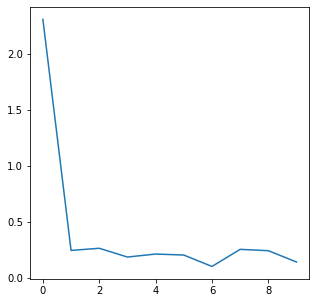

In [343]:
plt.plot(loss_arr)
plt.show()